In this step, we evaluate all classifiers on the validation set, by plotting all ROC curves together.

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_train = pd.read_csv('/Users/alessia/Desktop/churn/X_train.csv')
X_test = pd.read_csv('/Users/alessia/Desktop/churn/X_test.csv')
y_test = pd.read_csv('/Users/alessia/Desktop/churn/y_test.csv')
X_test_trans = pd.read_csv('/Users/alessia/Desktop/churn/X_test_trans.csv')
y_test_trans = pd.read_csv('/Users/alessia/Desktop/churn/y_test_trans.csv')

In [3]:
# import logistic regression
model_file=open('/Users/alessia/Desktop/churn/logistic_regression.pkl', 'rb')
logistic_regression=pickle.load(model_file)

# AUC on the test set
y_probs_test_lr = logistic_regression.predict_proba(X_test)[:, 1]
fpr_test_lr, tpr_test_lr, _ = roc_curve(y_test, y_probs_test_lr)
roc_auc_test_lr = auc(fpr_test_lr, tpr_test_lr)

In [4]:
# import k-Nearest Neighbors
model_file=open('/Users/alessia/Desktop/churn/knn.pkl', 'rb')
knn=pickle.load(model_file)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# AUC on the test set
y_probs_test_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr_test_knn, tpr_test_knn, _ = roc_curve(y_test, y_probs_test_knn)
roc_auc_test_knn = auc(fpr_test_knn, tpr_test_knn)

In [5]:
# import decision tree
model_file=open('/Users/alessia/Desktop/churn/decision_tree.pkl', 'rb')
decision_tree=pickle.load(model_file)

# AUC on the test set
y_probs_test_dt = decision_tree.predict_proba(X_test)[:, 1]
fpr_test_dt, tpr_test_dt, _ = roc_curve(y_test, y_probs_test_dt)
roc_auc_test_dt = auc(fpr_test_dt, tpr_test_dt)

In [6]:
# import Random Forest
model_file=open('/Users/alessia/Desktop/churn/random_forest.pkl', 'rb')
random_forest=pickle.load(model_file)

# AUC on the test set
y_probs_test_rf = random_forest.predict_proba(X_test)[:, 1]
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_test, y_probs_test_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)

In [7]:
# import AdaBoost
model_file=open('/Users/alessia/Desktop/churn/adaboost.pkl', 'rb')
adaboost=pickle.load(model_file)

# AUC on the test set
y_probs_test_ab = adaboost.predict_proba(X_test)[:, 1]
fpr_test_ab, tpr_test_ab, _ = roc_curve(y_test, y_probs_test_ab)
roc_auc_test_ab = auc(fpr_test_ab, tpr_test_ab)

In [8]:
# import XGBoost
model_file=open('/Users/alessia/Desktop/churn/XGBoost.pkl', 'rb')
XGBoost=pickle.load(model_file)

# AUC on the test set
y_probs_test_xg = XGBoost.predict_proba(X_test)[:, 1]
fpr_test_xg, tpr_test_xg, _ = roc_curve(y_test, y_probs_test_xg)
roc_auc_test_xg = auc(fpr_test_xg, tpr_test_xg)

In [9]:
# import LDA
model_file=open('/Users/alessia/Desktop/churn/LDA.pkl', 'rb')
LDA=pickle.load(model_file)

# AUC on the test set
y_probs_test_lda = LDA.predict_proba(X_test_trans)[:, 1]
fpr_test_lda, tpr_test_lda, _ = roc_curve(y_test_trans, y_probs_test_lda)
roc_auc_test_lda = auc(fpr_test_lda, tpr_test_lda)

In [10]:
# import QDA
model_file=open('/Users/alessia/Desktop/churn/QDA.pkl', 'rb')
QDA=pickle.load(model_file)

# AUC on the test set
y_probs_test_qda = QDA.predict_proba(X_test_trans)[:, 1]
fpr_test_qda, tpr_test_qda, _ = roc_curve(y_test_trans, y_probs_test_qda)
roc_auc_test_qda = auc(fpr_test_qda, tpr_test_qda)

In [11]:
# import base models and meta-learner for Stacking
model_file=open('/Users/alessia/Desktop/churn/gb_base.pkl', 'rb')
gb=pickle.load(model_file)
model_file=open('/Users/alessia/Desktop/churn/rf_base.pkl', 'rb')
rf=pickle.load(model_file)
model_file=open('/Users/alessia/Desktop/churn/dt_base.pkl', 'rb')
dt=pickle.load(model_file)

model_file=open('/Users/alessia/Desktop/churn/Stacking.pkl', 'rb')
meta_model=pickle.load(model_file)

# predict on base-learners
dt_pred_new = dt.predict(X_test)
rf_pred_new = rf.predict(X_test)
gb_pred_new = gb.predict(X_test)

X_new_meta = np.column_stack((dt_pred_new, rf_pred_new, gb_pred_new))

# AUC on the test set
y_probs_test_stack = meta_model.predict_proba(X_new_meta)[:, 1]
fpr_test_stack, tpr_test_stack, _ = roc_curve(y_test, y_probs_test_stack)
roc_auc_test_stack = auc(fpr_test_stack, tpr_test_stack)

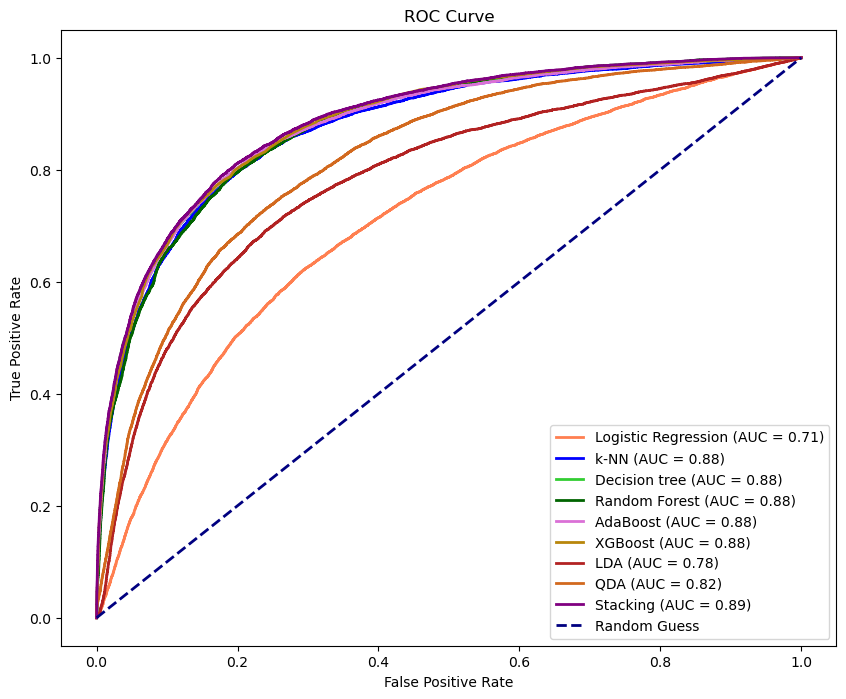

In [12]:
# ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_test_lr, tpr_test_lr, color='coral', lw=2, label=f'Logistic Regression (AUC = {roc_auc_test_lr:.2f})')
plt.plot(fpr_test_knn, tpr_test_knn, color='blue', lw=2, label=f'k-NN (AUC = {roc_auc_test_knn:.2f})')
plt.plot(fpr_test_dt, tpr_test_dt, color='limegreen', lw=2, label=f'Decision tree (AUC = {roc_auc_test_dt:.2f})')
plt.plot(fpr_test_rf, tpr_test_rf, color='darkgreen', lw=2, label=f'Random Forest (AUC = {roc_auc_test_rf:.2f})')
plt.plot(fpr_test_ab, tpr_test_ab, color='orchid', lw=2, label=f'AdaBoost (AUC = {roc_auc_test_ab:.2f})')
plt.plot(fpr_test_xg, tpr_test_xg, color='darkgoldenrod', lw=2, label=f'XGBoost (AUC = {roc_auc_test_xg:.2f})')
plt.plot(fpr_test_lda, tpr_test_lda, color='firebrick', lw=2, label=f'LDA (AUC = {roc_auc_test_lda:.2f})')
plt.plot(fpr_test_qda, tpr_test_qda, color='chocolate', lw=2, label=f'QDA (AUC = {roc_auc_test_qda:.2f})')
plt.plot(fpr_test_stack, tpr_test_stack, color='purple', lw=2, label=f'Stacking (AUC = {roc_auc_test_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

As we can see from the ROC curve, the model which performs best is Stacking. We will thus use this model to obtain probabilities on unseen data.